## MNIST Classification

#### Importing all the necessary libraries

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models

#### Loading Dataset

In [18]:
mnist=keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()


#### Looking some of the images and their corresponding labels

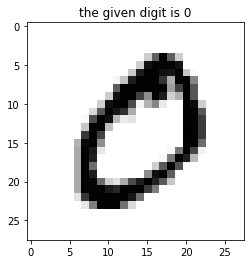

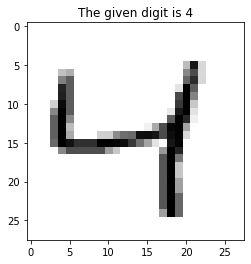

In [19]:
plt.imshow(255-X_train[1],cmap='gray')
plt.title('the given digit is '+str(y_train[1]))
plt.show()
plt.imshow(255-X_train[2],cmap='gray')
plt.title('The given digit is '+str(y_train[2]))
plt.show()

#### Data Processing

In [20]:
X_train_n=X_train/255.0
X_test_n=X_test/255.0

#### Reshaping The Data for CNN Model

In [21]:
X_train1=X_train_n.reshape(60000,28,28,1)
X_test1=X_test_n.reshape((10000,28,28,1))
X_valid,X_train1=X_train1[:5000],X_train1[5000:]
y_valid,y_train1=y_train[:5000],y_train[5000:]

In [22]:
y_train1=keras.utils.to_categorical(y_train1,10)
y_test=keras.utils.to_categorical(y_test,10)
y_valid=keras.utils.to_categorical(y_valid,10)
y_train1.shape

(55000, 10)

### Convolutional Neural Network Building

In [23]:
CNN_model=models.Sequential()
CNN_model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding='valid',strides=1,activation='relu',input_shape=(28,28,1)))
CNN_model.add(layers.MaxPooling2D(2,2))
CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dense(300,activation='relu'))
CNN_model.add(layers.Dense(100,activation='relu'))
CNN_model.add(layers.Dense(10,activation='softmax'))
CNN_model.compile(loss='categorical_crossentropy',
                 optimizer='sgd',
                  metrics=['accuracy'])

In [24]:
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

#### Train CNN Model


In [25]:
CNN_history=CNN_model.fit(X_train1,y_train1,validation_data=(X_valid,y_valid),epochs=20,verbose=1)

Epoch 1/20
1719/1719 [==============================] - 16s 10ms/step - loss: 0.4612 - accuracy: 0.8744 - val_loss: 0.2241 - val_accuracy: 0.9360
Epoch 2/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.1879 - accuracy: 0.9430 - val_loss: 0.1416 - val_accuracy: 0.9608
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1391 - accuracy: 0.9581 - val_loss: 0.1166 - val_accuracy: 0.9664
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1129 - accuracy: 0.9665 - val_loss: 0.0969 - val_accuracy: 0.9712
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0946 - accuracy: 0.9714 - val_loss: 0.0884 - val_accuracy: 0.9744
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0825 - accuracy: 0.9751 - val_loss: 0.0939 - val_accuracy: 0.9722
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0726 - accuracy: 0.9775 - val_loss: 0.0737 - val_accura

#### Plot Train and Validation Accuracy, Loss

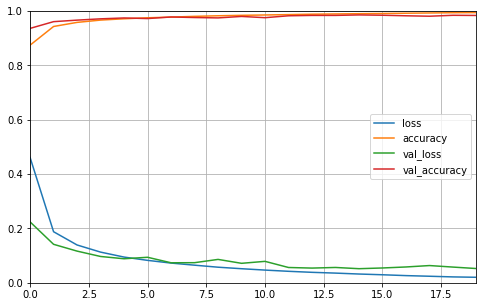

In [26]:
import pandas as pd
pd.DataFrame(CNN_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
loss, accuracy=CNN_model.evaluate(X_test1,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0591 - accuracy: 0.9827


In [28]:
print("Loss for the test set is ",round(loss,2))
print("Accuracy on the test set is ",round(accuracy,2))

Loss for the test set is  0.06
Accuracy on the test set is  0.98


#### Saving model 

*After saving the model we don't need to train the model again.*

In [36]:
CNN_model.save('CNN_model.h5')

#### Load Pretrained Model

In [37]:
CNN_model=keras.models.load_model('CNN_model.h5')
print(CNN_model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_9 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

#### Ploting the CNN Flow Chart

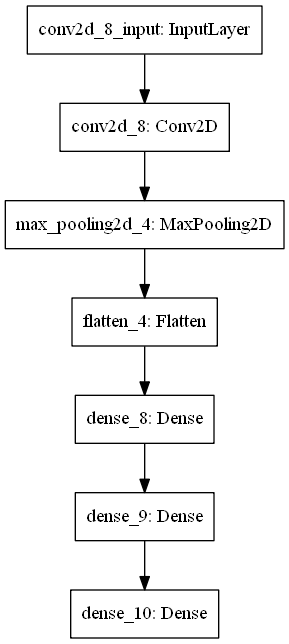

In [38]:
import pydot
keras.utils.plot_model(CNN_model)

#### To check the available GPUs

In [32]:
from tensorflow.python.client import device_lib
def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
print(get_available_gpus())
device_lib.list_local_devices()

['/device:GPU:0']


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10338630135743783535, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7539212217262692676
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3127299276
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13327886919832566424
 physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10609466458688997214
 physical_device_desc: "device: XLA_GPU device"]

#### Finding contours

*In OpenCV, finding contours is like finding white object from black background. It's basically join all the continuous points having same color or intensity*

In [33]:
def get_img_contour_thresh(img):
    x, y, w, h = 0, 0, 300, 300
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (35, 35), 0)
    ret, thresh1 = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    thresh1 = thresh1[y:y + h, x:x + w]
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2:]
    return img, contours, thresh1

#### GUI Code for Digit Recognition in live Video

In [35]:
import cv2
def main():
    cap = cv2.VideoCapture(0)
    while (cap.isOpened()):
        ret, img = cap.read()
        img, contours, thresh = get_img_contour_thresh(img)
        ans1,ans2 = '',''
        if len(contours) > 0:
            contour = max(contours, key=cv2.contourArea)
            if cv2.contourArea(contour) > 2500:
                x, y, w, h = cv2.boundingRect(contour)
                newImage = thresh[y:y + h, x:x + w]
                newImage = cv2.resize(newImage, (28, 28))
                newImage = np.array(newImage)
                newImage = newImage.flatten()
                newImage = newImage.reshape(1, 28, 28, 1)
                ans1 = CNN_model.predict(newImage)
                #ans2 = ANN_model.predict(newImage)
                ans1 = ans1.tolist()
                #ans2 = ans2.tolist()
                ans1 = ans1[0].index(max(ans1[0]))
                #ans2 = ans2[0].index(max(ans2[0]))
        x, y, w, h = 0, 0, 300, 300
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, " CNN Model : {c} ".format(c=ans1),(10,330),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        #cv2.putText(img, " ANN Model : {d} ".format(d=ans2),(10,350),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.imshow("Frame", img)
        cv2.imshow("Contours", thresh)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
main()

# ---------------------------------------    ThankYou!    -----------------------------------------------